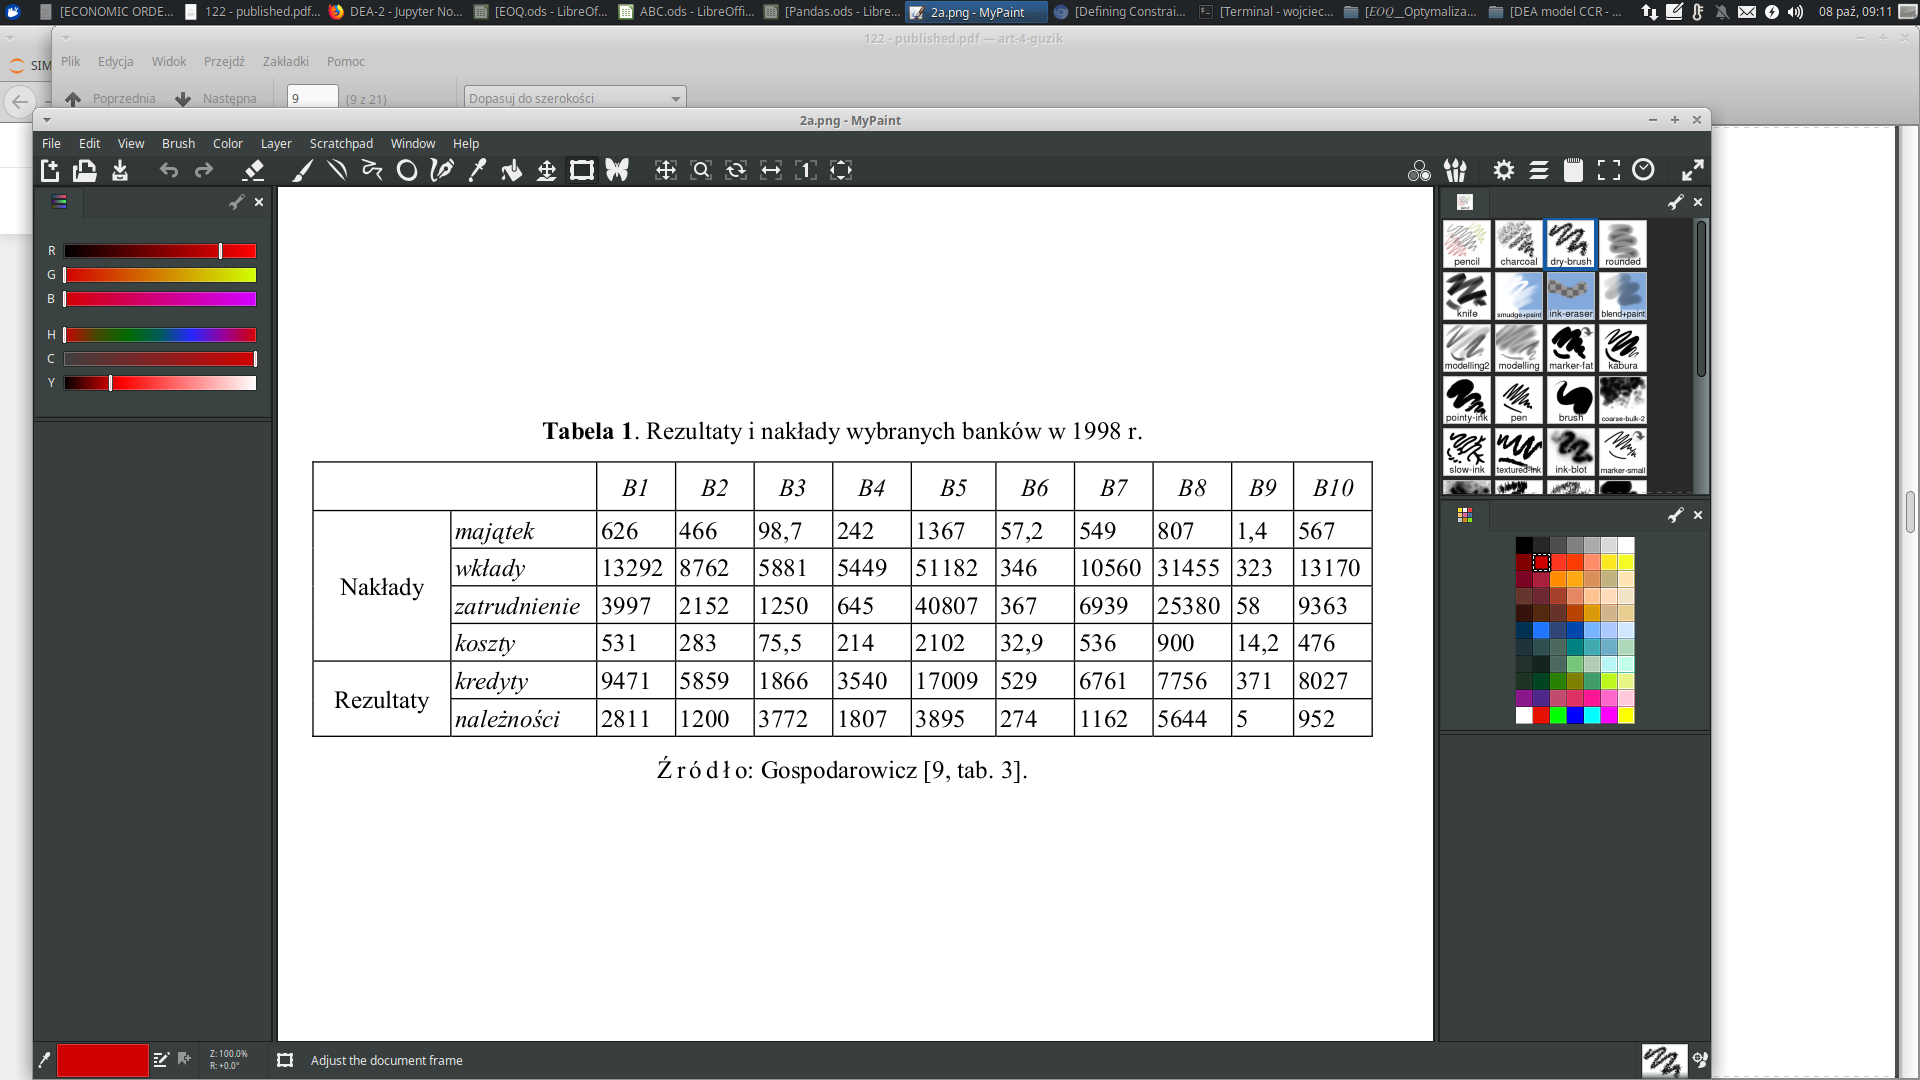


<span style="font-size: 150%;color:white;background:red"> MATERIAŁ WZORCOWY 2 CCR-DEA

<span style="font-size: 160%;color:#0000ff"> PODSTAWOWE MOŻLIWOŚCI ANALITYCZNE MODELU CCR-DEA, Bogusław GUZIK

https://stackoverflow.com/questions/26004610/defining-constraints-for-dea-optimization-in-python

In [1]:
k1 = 1.5
z1 = 1

inf1  = 626 * k1
maszyny1 = 2329 * k1
Zat1 =  38 * k1
Koszty1 = 531 * k1
produkcja1 = 9471*z1
Zysk1 = 28*z1

In [2]:
k2 = 1
z2 = 1

inf2  = 466*k2
maszyny2 = 976*k2
Zat2 =  23*k2
Koszty2 = 283*k2
produkcja2 = 5859*z2  
Zysk2 = 12*z2

In [3]:
k3 = 0.9
z3 = 1.2

inf3  = 98.7*k3
maszyny3 = 688*k3
Zat3 =  13*k3
Koszty3 = 75.5*k3
produkcja3 = 1866*z3  
Zysk3 = 37*z3

In [4]:
k4 = 1.3
z4 = 0.7

inf4  = 242*k4
maszyny4 = 434*k4
Zat4 =  61*k4  
Koszty4 = 214*k4
produkcja4 = 3540*z4  
Zysk4 = 18*z4

In [5]:
k5 = 1.1
z5 = 0.6

inf5  = 1367*k5
maszyny5 = 5338*k5
Zat5 =  40*k5 
Koszty5 = 2102*k5
produkcja5 = 17009*z5 
Zysk5 = 38*z5

In [89]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Piekarnia","Bobry","Łopata","Lipniki","Nowa","Bartniki"]
table.append_row(["Wartość infrastruktury w tys",inf1,inf2 ,inf3,inf4,inf5])
table.append_row(["Wartość maszyn w tys.",maszyny1,maszyny2 ,maszyny3,maszyny4,maszyny5])
table.append_row(["Zatrudnienie na produkcji",Zat1,Zat2,Zat3,Zat4,Zat5])
table.append_row(["Koszty w tys.",Koszty1,Koszty2,Koszty3,Koszty4,Koszty5])
table.append_row(["Wielkość produkcji w tonach",produkcja1,produkcja2,produkcja3,produkcja4,produkcja5])
table.append_row(["Zysk brutto w tys.",Zysk1,Zysk2,Zysk3,Zysk4,Zysk5])
print(table)

+------------------------------+--------+--------+---------+--------+----------+
|          Piekarnia           | Bobry  | Łopata | Lipniki |  Nowa  | Bartniki |
+------------------------------+--------+--------+---------+--------+----------+
| Wartość infrastruktury w tys | 939.0  |  466   |  88.83  | 314.6  |  1503.7  |
+------------------------------+--------+--------+---------+--------+----------+
|    Wartość maszyn w tys.     | 3493.5 |  976   |  619.2  | 564.2  |  5871.8  |
+------------------------------+--------+--------+---------+--------+----------+
|  Zatrudnienie na produkcji   |  57.0  |   23   |  11.7   |  79.3  |   44.0   |
+------------------------------+--------+--------+---------+--------+----------+
|        Koszty w tys.         | 796.5  |  283   |  67.95  | 278.2  |  2312.2  |
+------------------------------+--------+--------+---------+--------+----------+
| Wielkość produkcji w tonach  |  9471  |  5859  | 2239.2  | 2478.0 | 10205.4  |
+---------------------------

# Aby obliczyć wydajność D2

#### $
\left\{
\begin{align} 
{939x_{1}+466x_{2}+88.83x_{3}+314.6x_{4}+1503.7x_{5}} & \leqslant 446θ_{2} & (1)\\
{3493.5x_{1}+976x_{2}+619.2x_{3}+564.2x_{4}+5871.x_{5}} & \leqslant 976θ_{2} & (2)\\
{57x_{1}+23x_{2}+11.7x_{3}+79.3x_{4}+44.0x_{5}} & \leqslant  23θ_{2} & (3)\\
{796.5x_{1}+283x_{2}+67.95x_{3}+278.2x_{4}+2312.2x_{5}} & \leqslant 283θ_{2} & (4)\\
{9471x_{1}+5859x_{2}+2239.2x_{3}+2478.0x_{4}+10205.4x_{5}} & \geqslant 5859 & (5)\\
{28x_{1}+12x_{2}+44.4x_{3}+12.6x_{4}+22.8x_{5}} & \geqslant 12 & (6)\\
θ_{2} & \leqslant 0
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
 {x_{1}}\geqslant 0 \\
 {x_{2}}\geqslant 0 \\ 
{x_{3}}\geqslant 0 \\ 
{x_{4}}\geqslant 0 \\
{x_{5}}\geqslant 0 \\
\end{align}
\right. 
$

$x_{1}$ to wydajność Bank Handlowy (wyrażona jako ułamek)

$x_{2}$ to wydajność BRE Bank (wyrażona jako ułamek)

$x_{3}$ to wydajność BIG Bank (wyrażona jako ułamek)

$x_{4}$ to wydajność Citibank (Poland) (wyrażona jako ułamek)

$x_{5}$ to wydajność PKO BP (wyrażona jako ułamek)


<span style="font-size: 350%;color:white;background:#1155cc"> B1 </span>
<span style="font-size: 350%;color:white;background:red">     Bank Handlowy

In [7]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_B1",LpMinimize)

In [8]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
θ1=LpVariable("θ1",lowBound=0,upBound=1, cat="Continuous")

### Dodajemy do platformy funkcje celu

Funkcja celu - maksymalizacja 

# $
θ_{1}  \to min\\
$

In [9]:
# objective function
prob += θ1, "Minimalizacja"

In [10]:
print(prob)

DEA_B1:
MINIMIZE
1*θ1 + 0
VARIABLES
θ1 <= 1 Continuous



In [11]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyn","Bobry","Łopata","Lipniki","Nowa","Bartniki"]
table.append_row(["Wartość infrastruktury w tys.",inf1,inf2 ,inf3,inf4,inf5])
table.append_row(["Wartość maszyn w tys.",maszyny1,maszyny2 ,maszyny3,maszyny4,maszyny5])
table.append_row(["Zatrudnienie na produkcji",Zat1,Zat2,Zat3,Zat4,Zat5])
table.append_row(["Koszty w tys.",Koszty1,Koszty2,Koszty3,Koszty4,Koszty5])
table.append_row(["Wielkość produkcji w tonach",produkcja1,produkcja2,produkcja3,produkcja4,produkcja5])
table.append_row(["Zysk brutto w tys.",Zysk1,Zysk2,Zysk3,Zysk4,Zysk5])
print(table)

+------------------------------+--------+--------+---------+--------+----------+
|             Młyn             | Bobry  | Łopata | Lipniki |  Nowa  | Bartniki |
+------------------------------+--------+--------+---------+--------+----------+
| Wartość infrastruktury w tys | 939.0  |  466   |  88.83  | 314.6  |  1503.7  |
|              .               |        |        |         |        |          |
+------------------------------+--------+--------+---------+--------+----------+
|    Wartość maszyn w tys.     | 3493.5 |  976   |  619.2  | 564.2  |  5871.8  |
+------------------------------+--------+--------+---------+--------+----------+
|  Zatrudnienie na produkcji   |  57.0  |   23   |  11.7   |  79.3  |   44.0   |
+------------------------------+--------+--------+---------+--------+----------+
|        Koszty w tys.         | 796.5  |  283   |  67.95  | 278.2  |  2312.2  |
+------------------------------+--------+--------+---------+--------+----------+
| Wielkość produkcji w tonac

#### $
\left\{
\begin{align} 
{939x_{1}+466x_{2}+88.83x_{3}+314.6x_{4}+1503.7x_{5}} & \leqslant 939θ_{1} & (1)\\
{3493.5x_{1}+976x_{2}+619.2x_{3}+564.2x_{4}+5871.x_{5}} & \leqslant 3493.5θ_{1} & (2)\\
{57x_{1}+23x_{2}+11.7x_{3}+79.3x_{4}+44.0x_{5}} & \leqslant  57θ_{1} & (3)\\
{796.5x_{1}+283x_{2}+67.95x_{3}+278.2x_{4}+2312.2x_{5}} & \leqslant 796.5θ_{1}& (4)\\
{9471x_{1}+5859x_{2}+2239.2x_{3}+2478.0x_{4}+10205.4x_{5}} & \geqslant 9471 & (5)\\
{28x_{1}+12x_{2}+44.4x_{3}+12.6x_{4}+22.8x_{5}} & \geqslant 28 & (6)\\
θ_{2} & \leqslant 0
\end{align}
\right. 
$

In [12]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyn","Bobry","Łopata","Lipniki","Nowa","Bartniki"]
table.append_row(["Wartość infrastruktury w tys.",inf1,inf2 ,inf3,inf4,inf5])
table.append_row(["Wartość maszyn w tys.",maszyny1,maszyny2 ,maszyny3,maszyny4,maszyny5])
table.append_row(["Zatrudnienie na produkcji",Zat1,Zat2,Zat3,Zat4,Zat5])
table.append_row(["Koszty w tys.",Koszty1,Koszty2,Koszty3,Koszty4,Koszty5])
table.append_row(["Wielkość produkcji w tonach",produkcja1,produkcja2,produkcja3,produkcja4,produkcja5])
table.append_row(["Zysk brutto w tys.",Zysk1,Zysk2,Zysk3,Zysk4,Zysk5])
print(table)

+------------------------------+--------+--------+---------+--------+----------+
|             Młyn             | Bobry  | Łopata | Lipniki |  Nowa  | Bartniki |
+------------------------------+--------+--------+---------+--------+----------+
| Wartość infrastruktury w tys | 939.0  |  466   |  88.83  | 314.6  |  1503.7  |
|              .               |        |        |         |        |          |
+------------------------------+--------+--------+---------+--------+----------+
|    Wartość maszyn w tys.     | 3493.5 |  976   |  619.2  | 564.2  |  5871.8  |
+------------------------------+--------+--------+---------+--------+----------+
|  Zatrudnienie na produkcji   |  57.0  |   23   |  11.7   |  79.3  |   44.0   |
+------------------------------+--------+--------+---------+--------+----------+
|        Koszty w tys.         | 796.5  |  283   |  67.95  | 278.2  |  2312.2  |
+------------------------------+--------+--------+---------+--------+----------+
| Wielkość produkcji w tonac

In [13]:
# main constraints
prob += inf1*𝑥1+inf2*𝑥2+inf3*𝑥3+inf4*𝑥4+inf5*𝑥5<=inf1*θ1

In [14]:
prob += maszyny1*𝑥1+maszyny2*𝑥2+maszyny3*𝑥3+maszyny4*𝑥4+maszyny5*𝑥5<=maszyny1*θ1

In [15]:
prob += Zat1*𝑥1+Zat2*𝑥2+Zat3*𝑥3+Zat4*x4+Zat5*𝑥5<=Zat1*θ1

In [16]:
prob += Koszty1*𝑥1+Koszty2*𝑥2+Koszty3*𝑥3+Koszty4*𝑥4+Koszty5*𝑥5<=Koszty1*θ1

In [17]:
prob += produkcja1*𝑥1+produkcja2*𝑥2+produkcja3*𝑥3+produkcja4*𝑥4+produkcja5*𝑥5>=produkcja1

In [18]:
prob += Zysk1*𝑥1+Zysk2*𝑥2+Zysk3*𝑥3+Zysk4*𝑥4+Zysk5*𝑥5>=Zysk1

In [19]:
print(prob)

DEA_B1:
MINIMIZE
1*θ1 + 0
SUBJECT TO
_C1: 939 x1 + 466 x2 + 88.83 x3 + 314.6 x4 + 1503.7 x5 - 939 θ1 <= 0

_C2: 3493.5 x1 + 976 x2 + 619.2 x3 + 564.2 x4 + 5871.8 x5 - 3493.5 θ1 <= 0

_C3: 57 x1 + 23 x2 + 11.7 x3 + 79.3 x4 + 44 x5 - 57 θ1 <= 0

_C4: 796.5 x1 + 283 x2 + 67.95 x3 + 278.2 x4 + 2312.2 x5 - 796.5 θ1 <= 0

_C5: 9471 x1 + 5859 x2 + 2239.2 x3 + 2478 x4 + 10205.4 x5 >= 9471

_C6: 28 x1 + 12 x2 + 44.4 x3 + 12.6 x4 + 22.8 x5 >= 28

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
θ1 <= 1 Continuous



### Rozwiązanie problemu

In [20]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [21]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 1200201/980339
x3 = 794377/774053
x4 = 0
x5 = 0
θ1 = 410877/583088


In [22]:
θ1

θ1

In [23]:
B1 = 410877/583088


B1

0.7046569300002744

<span style="font-size: 150%;color:white;background:red">Wydajność B1 (Bank Handlowy) wynosi 0.756

In [24]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 410877/583088


<span style="font-size: 350%;color:white;background:#1155cc"> B2 </span>
<span style="font-size: 350%;color:white;background:red">     BRE Bank

#### $
\left\{
\begin{align} 
{939x_{1}+466x_{2}+88.83x_{3}+314.6x_{4}+1503.7x_{5}} & \leqslant 446θ_{2} & (1)\\
{3493.5x_{1}+976x_{2}+619.2x_{3}+564.2x_{4}+5871.x_{5}} & \leqslant 976θ_{2} & (2)\\
{57x_{1}+23x_{2}+11.7x_{3}+79.3x_{4}+44.0x_{5}} & \leqslant  23θ_{2} & (3)\\
{796.5x_{1}+283x_{2}+67.95x_{3}+278.2x_{4}+2312.2x_{5}} & \leqslant 283θ_{2} & (1)\\
{9471x_{1}+5859x_{2}+2239.2x_{3}+2478.0x_{4}+10205.4x_{5}} & \geqslant 5859 & (1)\\
{28x_{1}+12x_{2}+44.4x_{3}+12.6x_{4}+22.8x_{5}} & \geqslant 12 & (1)\\
θ_{2} & \leqslant 0
\end{align}
\right. 
$

In [25]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_B2",LpMinimize)

In [26]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
θ2=LpVariable("θ2",lowBound=0,upBound=1, cat="Continuous")

### Dodajemy do platformy funkcje celu

Funkcja celu - maksymalizacja Dorking

# $
θ_{2}  \to min\\
$

In [27]:
# objective function
prob += θ2, "Minimalizacja"

In [28]:
print(prob)

DEA_B2:
MINIMIZE
1*θ2 + 0
VARIABLES
θ2 <= 1 Continuous



In [29]:
# main constraints
prob += inf1*𝑥1+inf2*𝑥2+inf3*𝑥3+inf4*𝑥4+inf5*𝑥5<=inf2*θ2

In [30]:
prob += maszyny1*𝑥1+maszyny2*𝑥2+maszyny3*𝑥3+maszyny4*𝑥4+maszyny5*𝑥5<=maszyny2*θ2

In [31]:
prob += Zat1*𝑥1+Zat2*𝑥2+Zat3*𝑥3+Zat4*x4+Zat5*𝑥5<=Zat2*θ2

In [32]:
prob += Koszty1*𝑥1+Koszty2*𝑥2+Koszty3*𝑥3+Koszty4*𝑥4+Koszty5*𝑥5<=Koszty2*θ2

In [33]:
prob += produkcja1*𝑥1+produkcja2*𝑥2+produkcja3*𝑥3+produkcja4*𝑥4+produkcja5*𝑥5>=produkcja2

In [34]:
prob += Zysk1*𝑥1+Zysk2*𝑥2+Zysk3*𝑥3+Zysk4*𝑥4+Zysk5*𝑥5>=Zysk2

In [35]:
print(prob)

DEA_B2:
MINIMIZE
1*θ2 + 0
SUBJECT TO
_C1: 939 x1 + 466 x2 + 88.83 x3 + 314.6 x4 + 1503.7 x5 - 466 θ2 <= 0

_C2: 3493.5 x1 + 976 x2 + 619.2 x3 + 564.2 x4 + 5871.8 x5 - 976 θ2 <= 0

_C3: 57 x1 + 23 x2 + 11.7 x3 + 79.3 x4 + 44 x5 - 23 θ2 <= 0

_C4: 796.5 x1 + 283 x2 + 67.95 x3 + 278.2 x4 + 2312.2 x5 - 283 θ2 <= 0

_C5: 9471 x1 + 5859 x2 + 2239.2 x3 + 2478 x4 + 10205.4 x5 >= 5859

_C6: 28 x1 + 12 x2 + 44.4 x3 + 12.6 x4 + 22.8 x5 >= 12

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
θ2 <= 1 Continuous



### Rozwiązanie problemu

In [36]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [37]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 1
x3 = 0
x4 = 0
x5 = 0
θ2 = 1


In [38]:
B2 = 1
B2

1

<span style="font-size: 150%;color:white;background:red">Wydajność B2 (BRE Bank) wynosi 0.797

In [39]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 1


<span style="font-size: 350%;color:white;background:#1155cc"> B3 </span>
<span style="font-size: 350%;color:white;background:red">     BIG Bank 

In [40]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_B3",LpMinimize)

In [41]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
θ3=LpVariable("θ3",lowBound=0,upBound=1, cat="Continuous")

### Dodajemy do platformy funkcje celu

Funkcja celu - maksymalizacja 

# $
θ_{3}  \to min\\
$

In [42]:
# objective function
prob += θ3, "Minimalizacja"

In [43]:
print(prob)

DEA_B3:
MINIMIZE
1*θ3 + 0
VARIABLES
θ3 <= 1 Continuous



In [44]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyn","Bobry","Łopata","Lipniki","Nowa","Bartniki"]
table.append_row(["Wartość infrastruktury w tys.",inf1,inf2 ,inf3,inf4,inf5])
table.append_row(["Wartość maszyn w tys.",maszyny1,maszyny2 ,maszyny3,maszyny4,maszyny5])
table.append_row(["Zatrudnienie na produkcji",Zat1,Zat2,Zat3,Zat4,Zat5])
table.append_row(["Koszty w tys.",Koszty1,Koszty2,Koszty3,Koszty4,Koszty5])
table.append_row(["Wielkość produkcji w tonach",produkcja1,produkcja2,produkcja3,produkcja4,produkcja5])
table.append_row(["Zysk brutto w tys.",Zysk1,Zysk2,Zysk3,Zysk4,Zysk5])
print(table)

+------------------------------+--------+--------+---------+--------+----------+
|             Młyn             | Bobry  | Łopata | Lipniki |  Nowa  | Bartniki |
+------------------------------+--------+--------+---------+--------+----------+
| Wartość infrastruktury w tys | 939.0  |  466   |  88.83  | 314.6  |  1503.7  |
|              .               |        |        |         |        |          |
+------------------------------+--------+--------+---------+--------+----------+
|    Wartość maszyn w tys.     | 3493.5 |  976   |  619.2  | 564.2  |  5871.8  |
+------------------------------+--------+--------+---------+--------+----------+
|  Zatrudnienie na produkcji   |  57.0  |   23   |  11.7   |  79.3  |   44.0   |
+------------------------------+--------+--------+---------+--------+----------+
|        Koszty w tys.         | 796.5  |  283   |  67.95  | 278.2  |  2312.2  |
+------------------------------+--------+--------+---------+--------+----------+
| Wielkość produkcji w tonac

#### $
\left\{
\begin{align} 
{939x_{1}+466x_{2}+88.83x_{3}+314.6x_{4}+1503.7x_{5}} & \leqslant 88.83θ_{3} & (1)\\
{3493.5x_{1}+976x_{2}+619.2x_{3}+564.2x_{4}+5871.x_{5}} & \leqslant 619.2θ_{3} & (2)\\
{57x_{1}+23x_{2}+11.7x_{3}+79.3x_{4}+44.0x_{5}} & \leqslant  11.7θ_{3} & (3)\\
{796.5x_{1}+283x_{2}+67.95x_{3}+278.2x_{4}+2312.2x_{5}} & \leqslant 67.95θ_{3} & (4)\\
{9471x_{1}+5859x_{2}+2239.2x_{3}+2478.0x_{4}+10205.4x_{5}} & \geqslant 2239.2 & (5)\\
{28x_{1}+12x_{2}+44.4x_{3}+12.6x_{4}+22.8x_{5}} & \geqslant 44.4 & (6)\\
θ_{2} & \leqslant 0
\end{align}
\right. 
$

In [45]:
# main constraints
prob += inf1*𝑥1+inf2*𝑥2+inf3*𝑥3+inf4*𝑥4+inf5*𝑥5<=inf3*θ3

In [46]:
prob += maszyny1*𝑥1+maszyny2*𝑥2+maszyny3*𝑥3+maszyny4*𝑥4+maszyny5*𝑥5<=maszyny3*θ3

In [47]:
prob += Zat1*𝑥1+Zat2*𝑥2+Zat3*𝑥3+Zat4*x4+Zat5*𝑥5<=Zat3*θ3

In [48]:
prob += Koszty1*𝑥1+Koszty2*𝑥2+Koszty3*𝑥3+Koszty4*𝑥4+Koszty5*𝑥5<=Koszty3*θ3

In [49]:
prob += produkcja1*𝑥1+produkcja2*𝑥2+produkcja3*𝑥3+produkcja4*𝑥4+produkcja5*𝑥5>=produkcja3

In [50]:
prob += Zysk1*𝑥1+Zysk2*𝑥2+Zysk3*𝑥3+Zysk4*𝑥4+Zysk5*𝑥5>=Zysk3

In [51]:
print(prob)

DEA_B3:
MINIMIZE
1*θ3 + 0
SUBJECT TO
_C1: 939 x1 + 466 x2 + 88.83 x3 + 314.6 x4 + 1503.7 x5 - 88.83 θ3 <= 0

_C2: 3493.5 x1 + 976 x2 + 619.2 x3 + 564.2 x4 + 5871.8 x5 - 619.2 θ3 <= 0

_C3: 57 x1 + 23 x2 + 11.7 x3 + 79.3 x4 + 44 x5 - 11.7 θ3 <= 0

_C4: 796.5 x1 + 283 x2 + 67.95 x3 + 278.2 x4 + 2312.2 x5 - 67.95 θ3 <= 0

_C5: 9471 x1 + 5859 x2 + 2239.2 x3 + 2478 x4 + 10205.4 x5 >= 2239.2

_C6: 28 x1 + 12 x2 + 44.4 x3 + 12.6 x4 + 22.8 x5 >= 44.4

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
θ3 <= 1 Continuous



### Rozwiązanie problemu

In [52]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [53]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 0
x3 = 1
x4 = 0
x5 = 0
θ3 = 1


<span style="font-size: 150%;color:white;background:red">Wydajność B3 (BIG Bank ) wynosi 100%

In [54]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 1


In [55]:
B3=1
B3

1

<span style="font-size: 350%;color:white;background:#1155cc"> B4 </span>
<span style="font-size: 350%;color:white;background:red">     Citibank

In [56]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_B4",LpMinimize)

In [57]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
θ4=LpVariable("θ4",lowBound=0,upBound=1, cat="Continuous")

### Dodajemy do platformy funkcje celu

Funkcja celu - maksymalizacja 

# $
θ_{4}  \to min\\
$

In [58]:
# objective function
prob += θ4, "Minimalizacja"

In [59]:
print(prob)

DEA_B4:
MINIMIZE
1*θ4 + 0
VARIABLES
θ4 <= 1 Continuous



In [60]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyn","Bobry","Łopata","Lipniki","Nowa","Bartniki"]
table.append_row(["Wartość infrastruktury w tys.",inf1,inf2 ,inf3,inf4,inf5])
table.append_row(["Wartość maszyn w tys.",maszyny1,maszyny2 ,maszyny3,maszyny4,maszyny5])
table.append_row(["Zatrudnienie na produkcji",Zat1,Zat2,Zat3,Zat4,Zat5])
table.append_row(["Koszty w tys.",Koszty1,Koszty2,Koszty3,Koszty4,Koszty5])
table.append_row(["Wielkość produkcji w tonach",produkcja1,produkcja2,produkcja3,produkcja4,produkcja5])
table.append_row(["Zysk brutto w tys.",Zysk1,Zysk2,Zysk3,Zysk4,Zysk5])
print(table)

+------------------------------+--------+--------+---------+--------+----------+
|             Młyn             | Bobry  | Łopata | Lipniki |  Nowa  | Bartniki |
+------------------------------+--------+--------+---------+--------+----------+
| Wartość infrastruktury w tys | 939.0  |  466   |  88.83  | 314.6  |  1503.7  |
|              .               |        |        |         |        |          |
+------------------------------+--------+--------+---------+--------+----------+
|    Wartość maszyn w tys.     | 3493.5 |  976   |  619.2  | 564.2  |  5871.8  |
+------------------------------+--------+--------+---------+--------+----------+
|  Zatrudnienie na produkcji   |  57.0  |   23   |  11.7   |  79.3  |   44.0   |
+------------------------------+--------+--------+---------+--------+----------+
|        Koszty w tys.         | 796.5  |  283   |  67.95  | 278.2  |  2312.2  |
+------------------------------+--------+--------+---------+--------+----------+
| Wielkość produkcji w tonac

#### $
\left\{
\begin{align} 
{939x_{1}+466x_{2}+88.83x_{3}+314.6x_{4}+1503.7x_{5}} & \leqslant 314.6θ_{4} & (1)\\
{3493.5x_{1}+976x_{2}+619.2x_{3}+564.2x_{4}+5871.x_{5}} & \leqslant 564.2θ_{4} & (2)\\
{57x_{1}+23x_{2}+11.7x_{3}+79.3x_{4}+44.0x_{5}} & \leqslant  79.3θ_{4} & (3)\\
{796.5x_{1}+283x_{2}+67.95x_{3}+278.2x_{4}+2312.2x_{5}} & \leqslant 278.2θ_{4} & (4)\\
{9471x_{1}+5859x_{2}+2239.2x_{3}+2478.0x_{4}+10205.4x_{5}} & \geqslant 2478.0 & (5)\\
{28x_{1}+12x_{2}+44.4x_{3}+12.6x_{4}+22.8x_{5}} & \geqslant 12.6 & (6)\\
θ_{2} & \leqslant 0
\end{align}
\right. 
$

In [61]:
# main constraints
prob += inf1*𝑥1+inf2*𝑥2+inf3*𝑥3+inf4*𝑥4+inf5*𝑥5<=inf4*θ4

In [62]:
prob += maszyny1*𝑥1+maszyny2*𝑥2+maszyny3*𝑥3+maszyny4*𝑥4+maszyny5*𝑥5<=maszyny4*θ4

In [63]:
prob += Zat1*𝑥1+Zat2*𝑥2+Zat3*𝑥3+Zat4*x4+Zat5*𝑥5<=Zat4*θ4

In [64]:
prob += Koszty1*𝑥1+Koszty2*𝑥2+Koszty3*𝑥3+Koszty4*𝑥4+Koszty5*𝑥5<=Koszty4*θ4

In [65]:
prob += produkcja1*𝑥1+produkcja2*𝑥2+produkcja3*𝑥3+produkcja4*𝑥4+produkcja5*𝑥5>=produkcja4

In [66]:
prob += Zysk1*𝑥1+Zysk2*𝑥2+Zysk3*𝑥3+Zysk4*𝑥4+Zysk5*𝑥5>=Zysk4

In [67]:
print(prob)

DEA_B4:
MINIMIZE
1*θ4 + 0
SUBJECT TO
_C1: 939 x1 + 466 x2 + 88.83 x3 + 314.6 x4 + 1503.7 x5 - 314.6 θ4 <= 0

_C2: 3493.5 x1 + 976 x2 + 619.2 x3 + 564.2 x4 + 5871.8 x5 - 564.2 θ4 <= 0

_C3: 57 x1 + 23 x2 + 11.7 x3 + 79.3 x4 + 44 x5 - 79.3 θ4 <= 0

_C4: 796.5 x1 + 283 x2 + 67.95 x3 + 278.2 x4 + 2312.2 x5 - 278.2 θ4 <= 0

_C5: 9471 x1 + 5859 x2 + 2239.2 x3 + 2478 x4 + 10205.4 x5 >= 2478

_C6: 28 x1 + 12 x2 + 44.4 x3 + 12.6 x4 + 22.8 x5 >= 12.6

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
θ4 <= 1 Continuous



### Rozwiązanie problemu

In [68]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [69]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 25104/71581
x3 = 149631/791707
x4 = 0
x5 = 0
θ4 = 622429/764556


<span style="font-size: 150%;color:white;background:red">Wydajność B4 (Citibank) wynosi 100%

In [70]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 622429/764556


In [71]:
B4 =622429/764556


B4

0.8141051799998954

<span style="font-size: 350%;color:white;background:#1155cc"> B5 </span>
<span style="font-size: 350%;color:white;background:red">     PKO BP

In [72]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_B5",LpMinimize)

In [73]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
θ5=LpVariable("θ5",lowBound=0,upBound=1, cat="Continuous")

### Dodajemy do platformy funkcje celu

Funkcja celu - maksymalizacja 

# $
θ_{5}  \to min\\
$

In [74]:
# objective function
prob += θ5, "Minimalizacja"

In [75]:
print(prob)

DEA_B5:
MINIMIZE
1*θ5 + 0
VARIABLES
θ5 <= 1 Continuous



In [76]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyn","Bobry","Łopata","Lipniki","Nowa","Bartniki"]
table.append_row(["Wartość infrastruktury w tys.",inf1,inf2 ,inf3,inf4,inf5])
table.append_row(["Wartość maszyn w tys.",maszyny1,maszyny2 ,maszyny3,maszyny4,maszyny5])
table.append_row(["Zatrudnienie na produkcji",Zat1,Zat2,Zat3,Zat4,Zat5])
table.append_row(["Koszty w tys.",Koszty1,Koszty2,Koszty3,Koszty4,Koszty5])
table.append_row(["Wielkość produkcji w tonach",produkcja1,produkcja2,produkcja3,produkcja4,produkcja5])
table.append_row(["Zysk brutto w tys.",Zysk1,Zysk2,Zysk3,Zysk4,Zysk5])
print(table)

+------------------------------+--------+--------+---------+--------+----------+
|             Młyn             | Bobry  | Łopata | Lipniki |  Nowa  | Bartniki |
+------------------------------+--------+--------+---------+--------+----------+
| Wartość infrastruktury w tys | 939.0  |  466   |  88.83  | 314.6  |  1503.7  |
|              .               |        |        |         |        |          |
+------------------------------+--------+--------+---------+--------+----------+
|    Wartość maszyn w tys.     | 3493.5 |  976   |  619.2  | 564.2  |  5871.8  |
+------------------------------+--------+--------+---------+--------+----------+
|  Zatrudnienie na produkcji   |  57.0  |   23   |  11.7   |  79.3  |   44.0   |
+------------------------------+--------+--------+---------+--------+----------+
|        Koszty w tys.         | 796.5  |  283   |  67.95  | 278.2  |  2312.2  |
+------------------------------+--------+--------+---------+--------+----------+
| Wielkość produkcji w tonac

#### $
\left\{
\begin{align} 
{939x_{1}+466x_{2}+88.83x_{3}+314.6x_{4}+1503.7x_{5}} & \leqslant 1503.7θ_{5} & (1)\\
{3493.5x_{1}+976x_{2}+619.2x_{3}+564.2x_{4}+5871.8x_{5}} & \leqslant 5871.8θ_{5} & (2)\\
{57x_{1}+23x_{2}+11.7x_{3}+79.3x_{4}+44.0x_{5}} & \leqslant  44.0θ_{5} & (3)\\
{796.5x_{1}+283x_{2}+67.95x_{3}+278.2x_{4}+2312.2x_{5}} & \leqslant 2312.2θ_{5} & (4)\\
{9471x_{1}+5859x_{2}+2239.2x_{3}+2478.0x_{4}+10205.4x_{5}} & \geqslant 10205.4 & (5)\\
{28x_{1}+12x_{2}+44.4x_{3}+12.6x_{4}+22.8x_{5}} & \geqslant 22.8 & (6)\\
θ_{2} & \leqslant 0
\end{align}
\right. 
$

In [77]:
# main constraints
prob += inf1*𝑥1+inf2*𝑥2+inf3*𝑥3+inf4*𝑥4+inf5*𝑥5<=inf5*θ5

In [78]:
prob += maszyny1*𝑥1+maszyny2*𝑥2+maszyny3*𝑥3+maszyny4*𝑥4+maszyny5*𝑥5<=maszyny5*θ5

In [79]:
prob += Zat1*𝑥1+Zat2*𝑥2+Zat3*𝑥3+Zat4*x4+Zat5*𝑥5<=Zat5*θ5

In [80]:
prob += Koszty1*𝑥1+Koszty2*𝑥2+Koszty3*𝑥3+Koszty4*𝑥4+Koszty5*𝑥5<=Koszty5*θ5

In [81]:
prob += produkcja1*𝑥1+produkcja2*𝑥2+produkcja3*𝑥3+produkcja4*𝑥4+produkcja5*𝑥5>=produkcja5

In [82]:
prob += Zysk1*𝑥1+Zysk2*𝑥2+Zysk3*𝑥3+Zysk4*𝑥4+Zysk5*𝑥5>=Zysk5

In [83]:
print(prob)

DEA_B5:
MINIMIZE
1*θ5 + 0
SUBJECT TO
_C1: 939 x1 + 466 x2 + 88.83 x3 + 314.6 x4 + 1503.7 x5 - 1503.7 θ5 <= 0

_C2: 3493.5 x1 + 976 x2 + 619.2 x3 + 564.2 x4 + 5871.8 x5 - 5871.8 θ5 <= 0

_C3: 57 x1 + 23 x2 + 11.7 x3 + 79.3 x4 + 44 x5 - 44 θ5 <= 0

_C4: 796.5 x1 + 283 x2 + 67.95 x3 + 278.2 x4 + 2312.2 x5 - 2312.2 θ5 <= 0

_C5: 9471 x1 + 5859 x2 + 2239.2 x3 + 2478 x4 + 10205.4 x5 >= 10205.4

_C6: 28 x1 + 12 x2 + 44.4 x3 + 12.6 x4 + 22.8 x5 >= 22.8

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
θ5 <= 1 Continuous



### Rozwiązanie problemu

In [84]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [85]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 1079108/626073
x3 = 11927/250189
x4 = 0
x5 = 0
θ5 = 356897/390625


<span style="font-size: 150%;color:white;background:red">Wydajność B5 (PKO BP ) wynosi 0.336

In [86]:
B5 = 356897/390625

B5

0.91365632

In [87]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 356897/390625


# Wydajność banków

In [90]:
from beautifultable import BeautifulTable

"Młyn","Bobry","Łopata","Lipniki","Nowa","Bartniki"

table = BeautifulTable()
table.column_headers = ["Młyn","Ocena"]
table.append_row(["Bobry",B1])
table.append_row(["Łopata",B2])
table.append_row(["Lipniki",B3])
table.append_row(["Nowa",B4])
table.append_row(["Bartniki",B5])
print(table)

+----------+-------+
|   Młyn   | Ocena |
+----------+-------+
|  Bobry   | 0.705 |
+----------+-------+
|  Łopata  |   1   |
+----------+-------+
| Lipniki  |   1   |
+----------+-------+
|   Nowa   | 0.814 |
+----------+-------+
| Bartniki | 0.914 |
+----------+-------+


bez zmian 

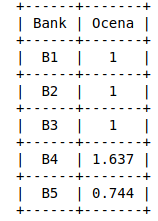